# Chaos Tools
A. Orbit Diagram

B. Poincare section

C. Lyaponov Exponents

[original code](https://github.com/JuliaDynamics/JuliaDynamics/blob/master/tutorials/Youtube_JuliaLang_tutorial/2.%20ChaosTools.ipynb)                     

[Youtube tutorial](https://www.youtube.com/watch?v=A8g9rdEfdNg)



In [45]:
using DynamicalSystems

In [46]:
#using Pkg
#Pkg.add("Plots")
#Pkg.add("Plotly")

In [47]:
using Plots
#plotly()

# A. Orbit Diagram

### What is an Orbit Diagram ?

An orbit diagram helps us to understnd the longterm behaviour of a synamical system when a parameter of the system is varied. 

**How to compute it?**
1. First evolve the dynamical system for some inital time steps, "transient time" (we do not save the trajectory during this time).
2. After transient time, strart saving the trajectory for a defined amout of time
3. Change the parameter of the equations of motion
4. Repeat steps 1-3 for all given parameter values

In `DynamicalSystems.jl` we can do the above steps using the function `orbitaldiagram` 

### Oribital DIagram for Logistic map

$$ x_{n+1} = rx_{n}(1-x_{n}) $$

In [48]:
logimap = Systems.logistic() # systems module contains pre-defined well-known systems

1-dimensional discrete dynamical system
 state:       0.605209926010545
 e.o.m.:      logistic_eom
 in-place?    false
 jacobian:    logistic_jacob
 parameters:  [4.0]

Now we will calculate the orbit diagram of the logistic map using the function 

`orbitdiagram(discrete_system, i, p_index, pvalues,;n, Ttr, ...)`

* `i` is the index of th variable we want to solve (for which we want to create the orbit diagram)
* `p_index` is the index of the parameter of the `discrete_system` we want to change
* `pvalues` is the parameter range that we want to explore
* kerword `Ttr` is tghe transient time 
* Keyword `n` is the time to which we want to evolve th system after the transient time

In [49]:
i = 1    # only one variable  in logistic map x
Ttr = 2000 # transient iterations (we do not use them or save them)
n = 2000   # no os values to save after transient time
p_index = 1 # only one parameter r
pvalues = 2.0:0.001:4  # parameter values for r

output = orbitdiagram(logimap, i, p_index, pvalues; n=n, Ttr=Ttr)
typeof(output)

Array{Array{Float64,1},1}

The output  is a vector of vctors. Each inner vector has length `n` and contains the values of the `i`th variable at a given parameter values

#### Plotting the orbital map for logistic equation

In [50]:
function plot_od(r1, r2, n = 1000, Ttr = 1000)
    params = range(r1, stop = r2, length = 1001)

    res = orbitdiagram(logimap, 1, 1, params; n = n, Ttr = Ttr)
    L = length(params)

    x = Matrix{Float64}(undef, n, L)
    y = Matrix{Float64}(undef, n, L)
    for j in 1:L
        x[:,j] .= params[j]
        y[:,j] .= res[j]
    end
    scatter(x, y, 
        markersize=0.1, markeralpha = 0.3, markercolor="black",
        leg=false, title="Bifurcation graph", 
        html_output_format=:png, size=(2000,1000))
end

plot_od (generic function with 3 methods)

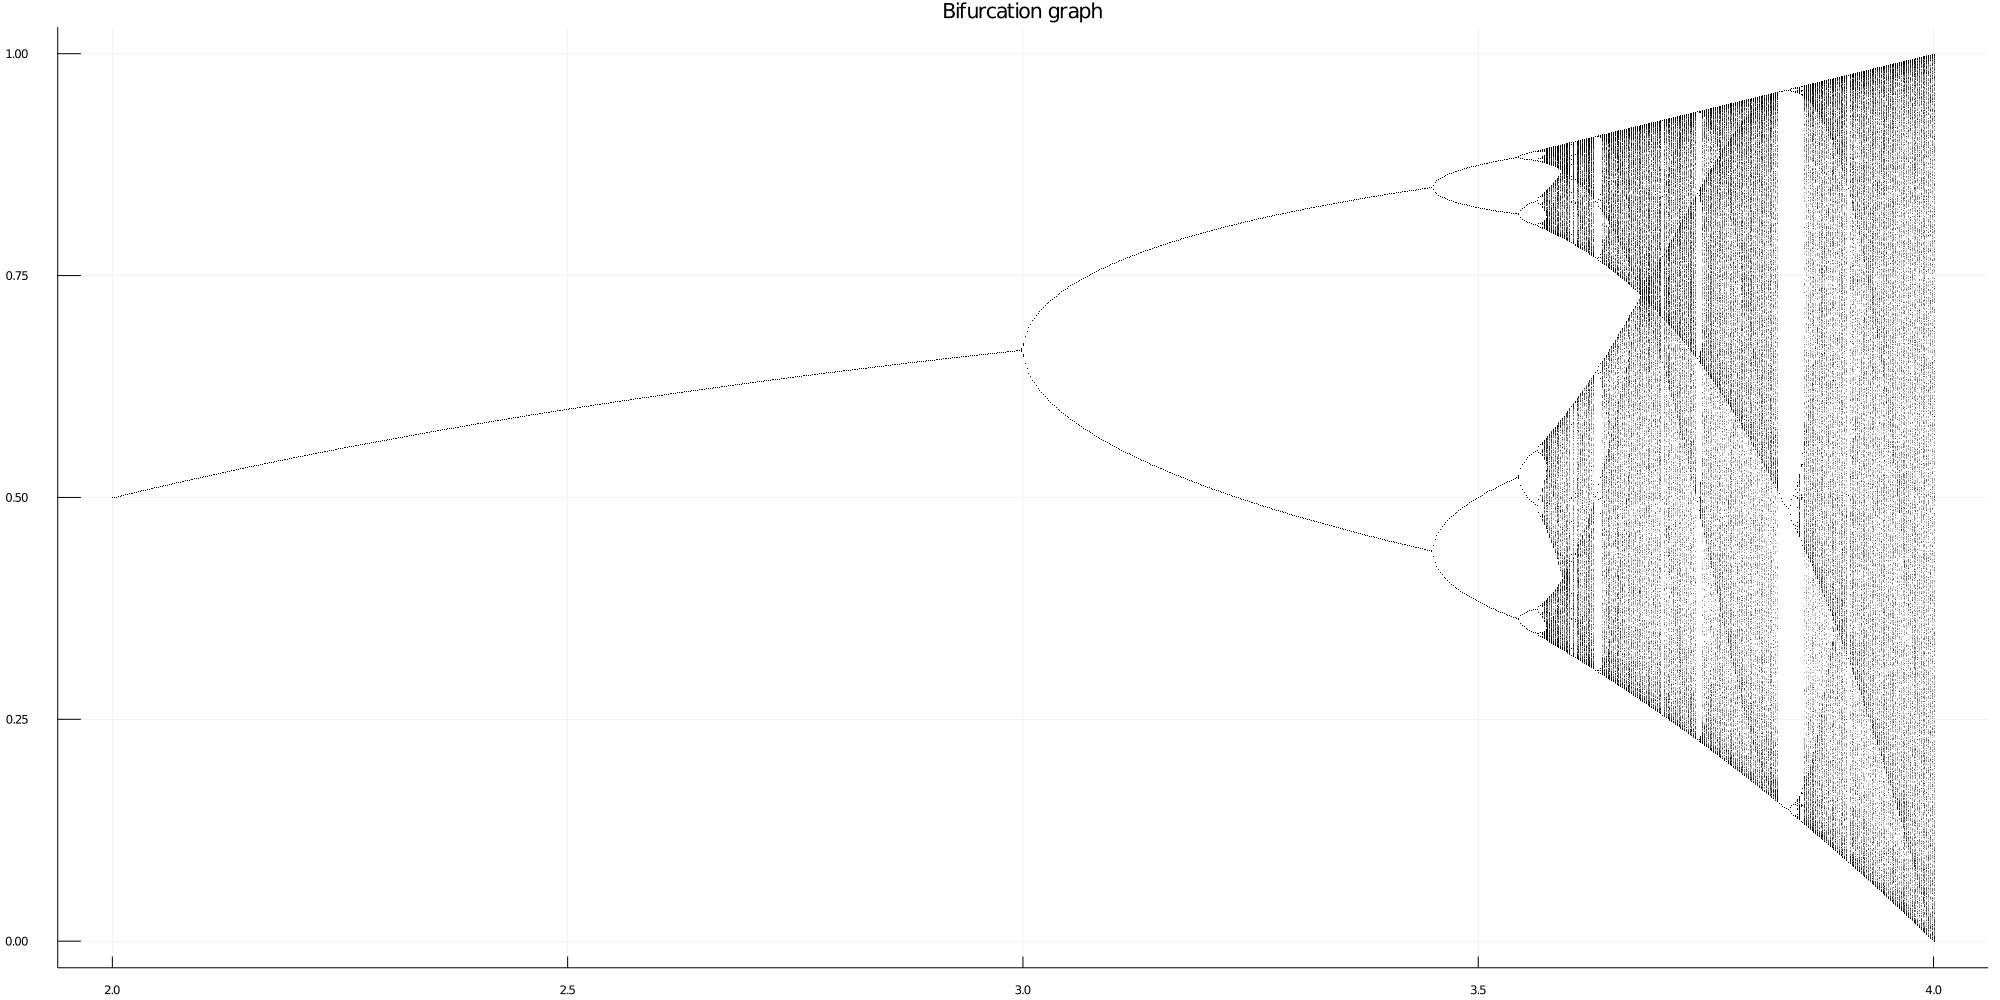

In [51]:
plot_od(2,4.0)

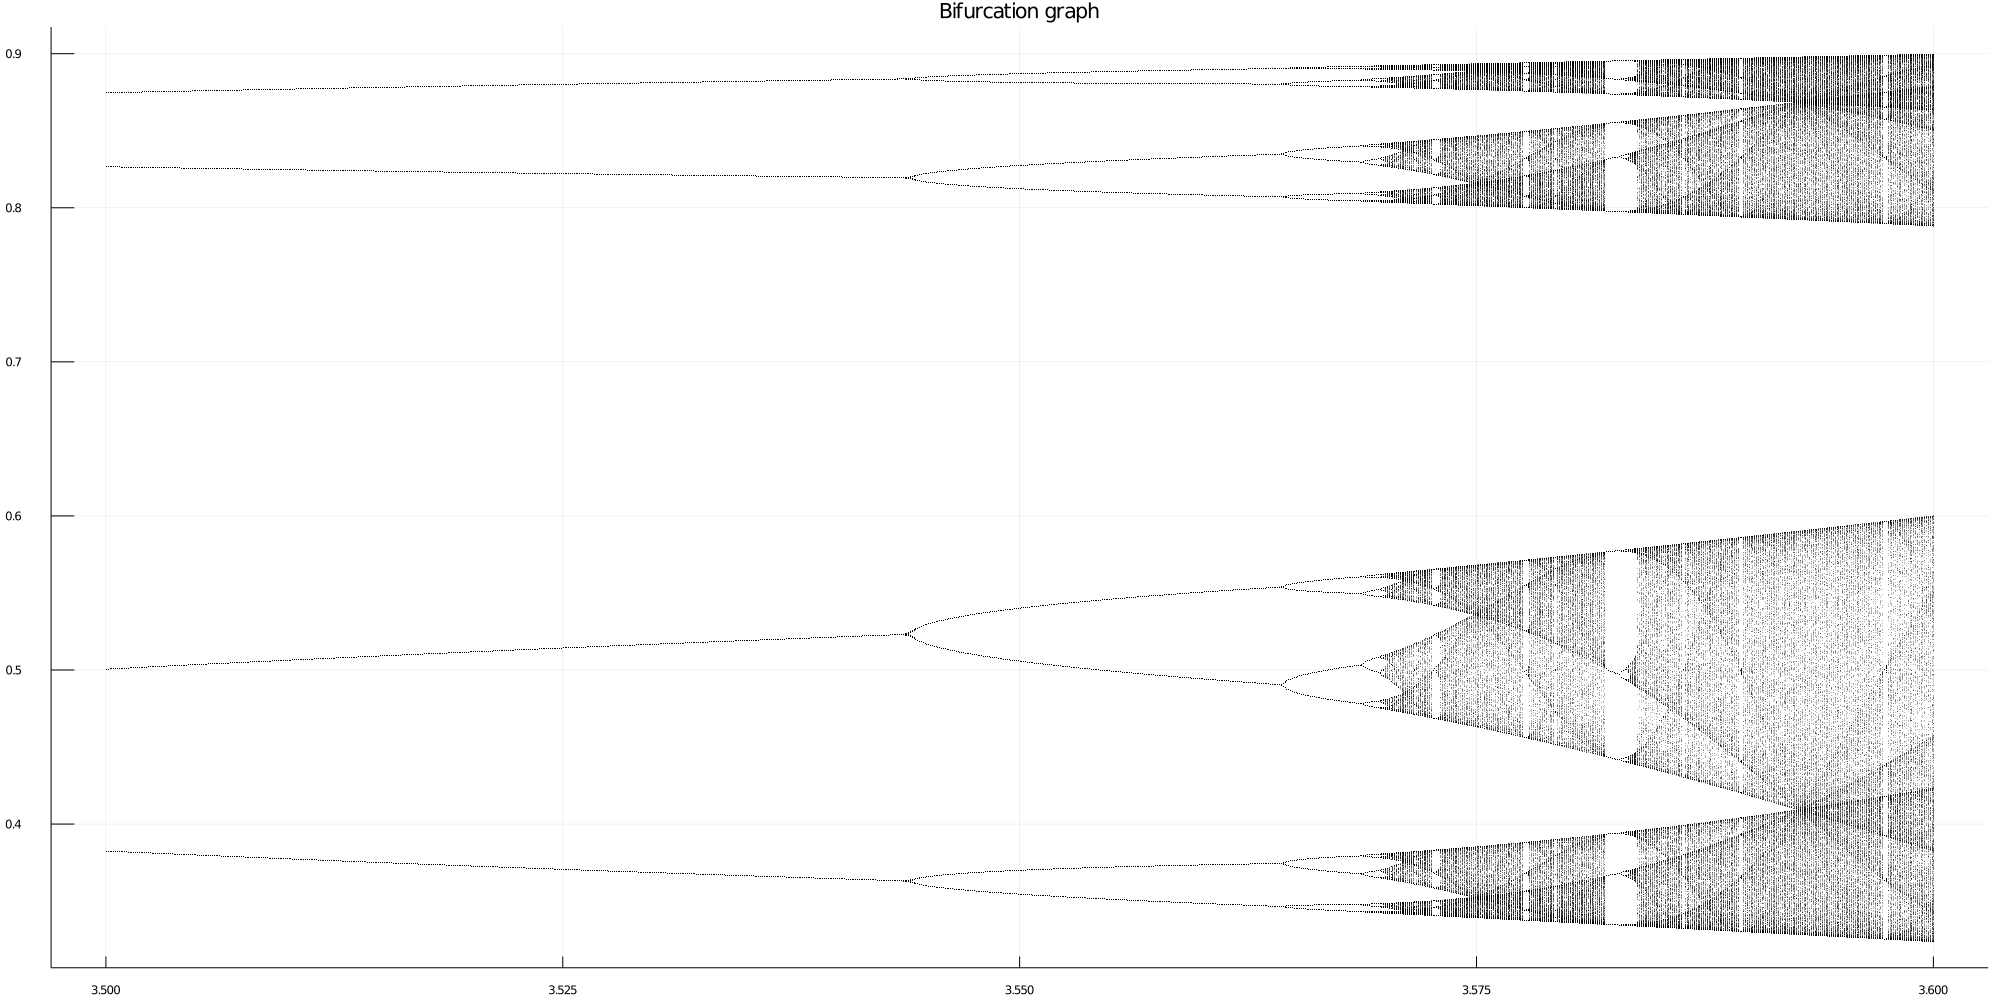

In [52]:
plot_od(3.5, 3.6)

`Orbitdiagram` Works with any discrete system

# B. Poincare section

This is a technique to reduce a continuous system into a descrete map with 1 fewer dimension. The technique for this is very simple

1. Define a hyperplane in the phase-space of a system
2. Evolve the continuous system for long times. Each time the trajectory crosses the plane, record th estate of the system. 
3. ONly crossings with a specific direction is allowed  (either positive or negative)

The recorded crossings from above method form a Poincare section

The equation of hyperplane for a system which has D dimensionla phase space is 
$$ a_{1}u_{1} + .... + a_{D}u_{D} = \mathbf{a}.\mathbf{u} = b$$

where $\mathbf{a}$ and $b$ are the parametes of the hyper plane and $\mathbf{u} = (u_{1}, ..., u_{D})$

In `DynamicalSystems.jl` we can define the function for Poincare section as follows 

`poincaresos(continuous_System, plane, tfinal=100.0; kwargs...)`

As an example we will plot the Poincare section for th elorentz system

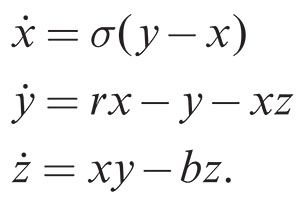

#### Define lorentz system

In [124]:
lor = Systems.lorenz()   # lorentz system is alredy defined in the library so we just call it

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 28.0, 2.6666666666666665]

#### Plot Trajectory

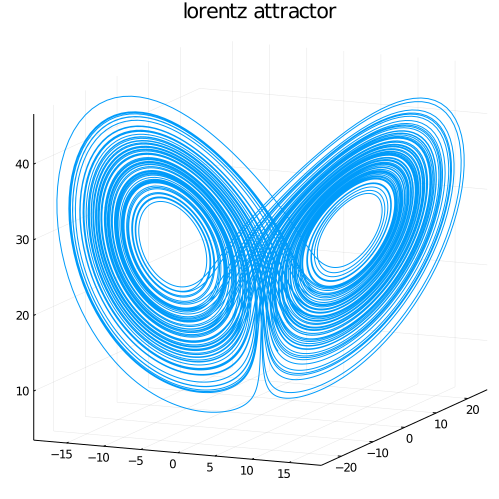

In [125]:
tr = trajectory(lor, 100, dt=0.005, Ttr=50.0) ## give me the trajectory of lorentz system, by evolving it for 100 times
x,y,z = columns(tr)

plot(x,y,z, leg=false, title="lorentz attractor",
     html_output_format=:png, size=(500,500))

#### Visualize Poincare section of surface in 3D

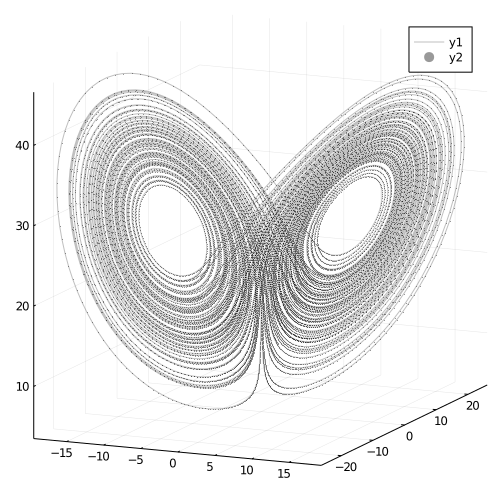

In [126]:
plot(x,y,z, color = :black, lw=1, alpha=0.25)               # continuous plot (interpolation)
scatter!(x,y,z,                                             # plotting  all actual  datapoints 
        markersize=1,markeralpha=0.4, markercolor="black",
        html_output_format=:png, size=(500,500))

With $y = 0$   plane, we will seperate the attractor into four subsets
* points in the front
* points in the back
* points crossing $y=0$ plane from the front
* points crossing $y=0$ plane from the backside

The `poincaresos` function would automatically find all points crosssing the $y=0$ plane from the back to the front, which we draw black in the following diagram

In [127]:
tr = trajectory(lor, 400.0, dt=0.005, Ttr=50.0)  # solve ODF and get trajectory
x,y,z = columns(tr) 

black = fill(false, length(y))  # from -ve to +ve direction
red   = fill(false, length(y))  # from +ve to -ve direction
blue  = fill(false, length(y))  # all +ve
green = fill(false, length(y))  # all -ve

for i in 1:length(y)-1
    if y[i] < 0 && y[i+1] > 0
        black[i] = true
    elseif y[i] > 0 && y[i+1] < 0
        red[i] = true
    elseif y[i]>0
        blue[i] = true
    else
        green[i] = true
    end
end

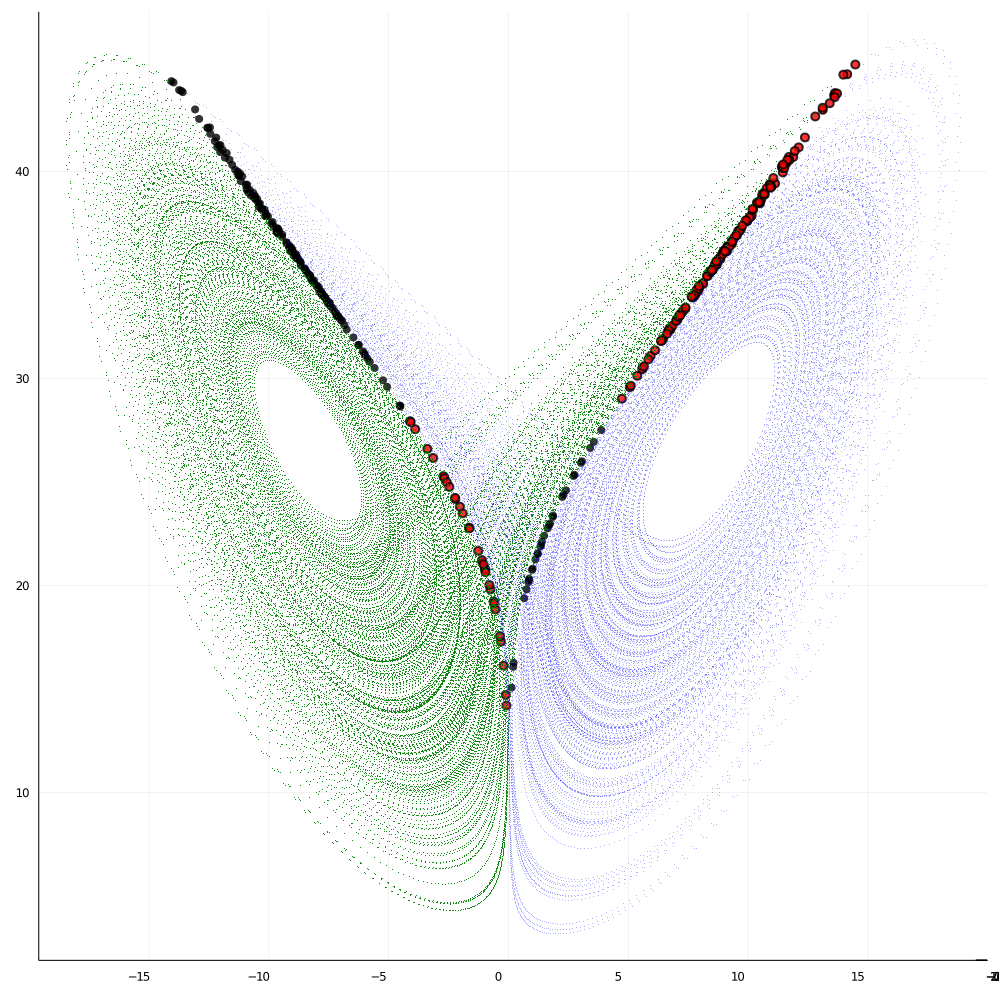

In [128]:
scatter(x[black], y[black], z[black], 
        markersize=5, markeralpha = 0.8, markercolor=:black)
scatter!(x[red], y[red], z[red], 
        markersize=5, markeralpha = 0.8, markercolor=:red)
scatter!(x[green], y[green], z[green], 
        markersize=1, markeralpha = 0.9, markercolor=:green)
scatter!(x[blue], y[blue], z[blue], 
        markersize=1, markeralpha = 0.3, markercolor=:blue,
        leg=false,
        html_output_format=:png, size=(1000,1000), camera = (0,0))

#### Now let us plot Poincare section 

In [132]:
plane = (2, 0.0) # when 2d variable crosses 0.0

(2, 0.0)

In [133]:
psos_chaotic = poincaresos(lor, plane, 2000.0, Ttr = 100.0)

3-dimensional Dataset{Float64} with 937 points
  -6.84084    -3.26833e-7   32.6236
 -10.9323     -1.51611e-8   39.4884
   2.42964     4.98167e-8   24.653
  -7.48051    -2.16374e-7   33.6897
 -13.5586     -2.89842e-8   44.0752
 -12.2479      6.38744e-9   41.7609
   0.0820689  -7.76434e-10  14.0957
  -6.44293    -3.98101e-7   31.9586
 -10.2996     -5.97271e-10  38.4108
  -9.52617    -5.72668e-8   37.105
 -12.9207      4.84257e-11  42.9422
   0.741676   -1.46593e-10  19.7543
  -6.42726    -3.95583e-7   31.9323
   ⋮                        
 -12.5787     -9.92325e-9   42.34
 -12.32       -2.11224e-11  41.8868
   1.15626    -3.38947e-10  21.3312
  -6.41022    -3.25056e-7   31.9038
 -10.2561     -2.35591e-9   38.337
  -9.1624     -7.75563e-10  36.4944
 -10.0302     -1.6222e-8    37.9547
   2.19418     1.83043e-8   24.1266
  -6.98386    -5.25592e-7   32.8626
 -11.227       2.84614e-9   39.9935
 -11.4022     -4.50491e-8   40.2947
   1.0579     -4.64854e-11  20.9966

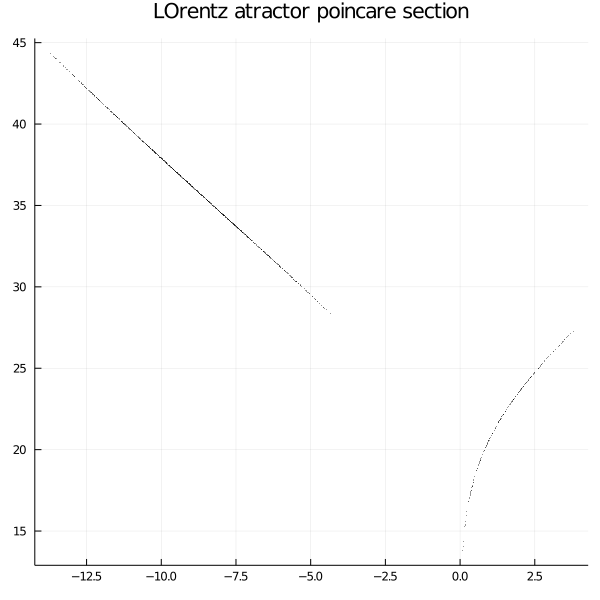

In [134]:
scatter(psos_chaotic[:,1], psos_chaotic[:,3],
        markersize=1, markeralpha=0.4, markercolor=:black,
        leg=false, title="LOrentz atractor poincare section",
        html_output_format=:png, size=(600,600))

* We see that the surface of the section is some kind of 1-dimensionla object
* This is expected because as we will see in the next exercises that the lorentz system has is a 2D attractor
* This means that when you take a cut through this object, the result would be 1-dimensional

#### Now let us draw the Poincare section for lorentz system when system is stable instead of chatic (above)

In [135]:
set_parameter!(lor, 2, 69.75) # changinf the parameter[2]

69.75

In [136]:
lor

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 69.75, 2.6666666666666665]

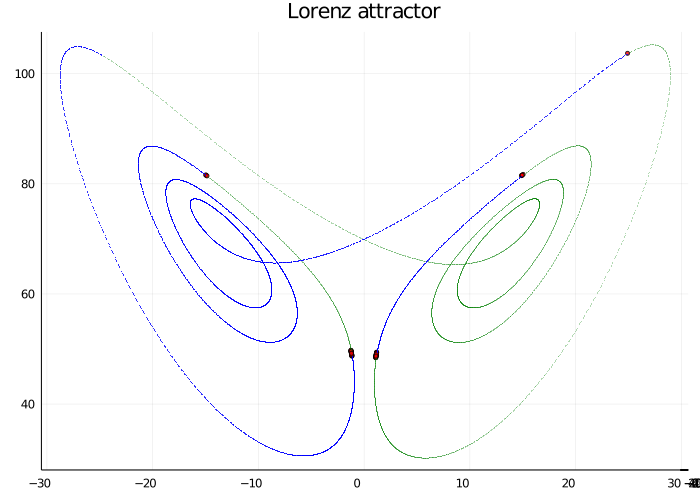

In [137]:
tr = trajectory(lor, 100.0, dt=0.01, Ttr=500.0)
x, y, z = columns(tr)
red = -0.1 .< y .< 0.1
blue = y .≤ -0.1
green = y .≥ 0.1;

scatter(x[red], y[red], z[red], 
        markersize=3, markeralpha = 0.8, markercolor=:red)
scatter!(x[green], y[green], z[green], 
        markersize=1, markeralpha = 0.3, markercolor=:green)
scatter!(x[blue], y[blue], z[blue], 
        markersize=1, markeralpha = 0.8, markercolor=:blue,
        leg=false, title="Lorenz attractor", 
        html_output_format=:png, size=(700,500), camera = (0,0))

In [138]:
psos_regular = poincaresos(lor, (2, 0.0), 2000.0, Ttr = 1000.0)
summary(psos_regular)

"3-dimensional Dataset{Float64} with 1710 points"

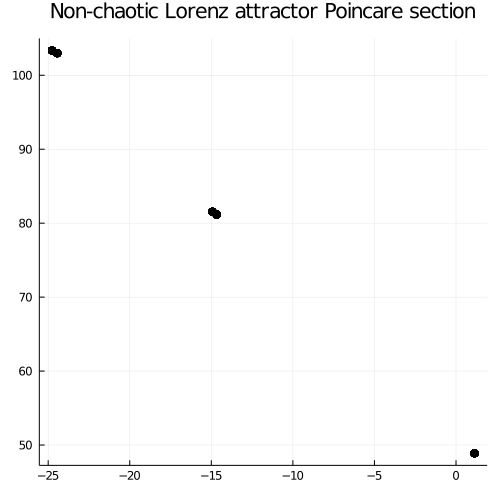

In [139]:
scatter(psos_regular[:, 1], psos_regular[:, 3],
        markersize=5, markeralpha = 0.5, markercolor=:black,
        leg=false, title="Non-chaotic Lorenz attractor Poincare section", 
        html_output_format=:png, size=(500,500))

And here are the two different PSOS plots side by side:

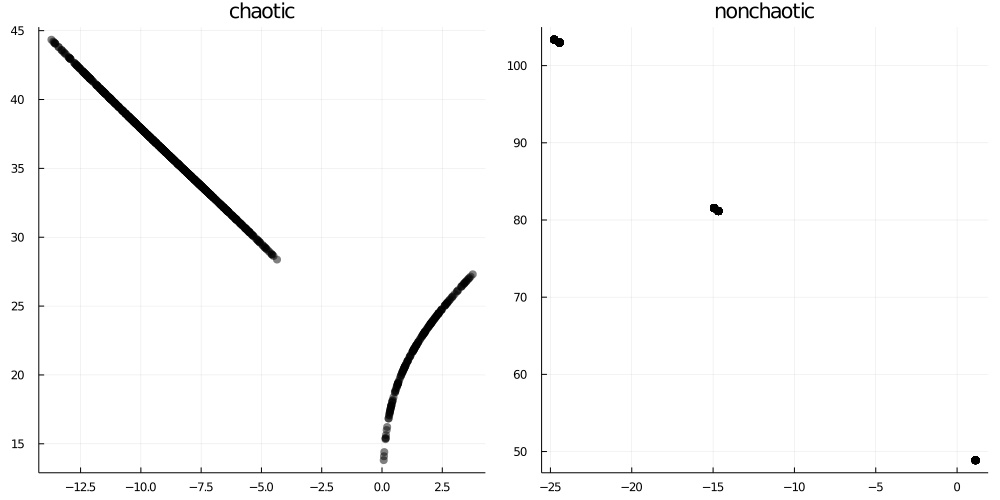

In [140]:
p1 = scatter(psos_chaotic[:, 1], psos_chaotic[:, 3],
        markersize=5, markeralpha = 0.5, markercolor=:black,
        leg=false, title="chaotic", 
        html_output_format=:png)

p2 = scatter(psos_regular[:, 1], psos_regular[:, 3],
        markersize=5, markeralpha = 0.5, markercolor=:black,
        leg=false, title="nonchaotic", 
        html_output_format=:png)

plot(p1,p2,layout=(1,2),legend=false, size=(1000,500))

# C. Lyapunov Exponents

### What are Lyapunov exponents of a Dynamical System?
Lyapunov exponents measure the exponentail seperation rate of trajectories that are iniitally close. 

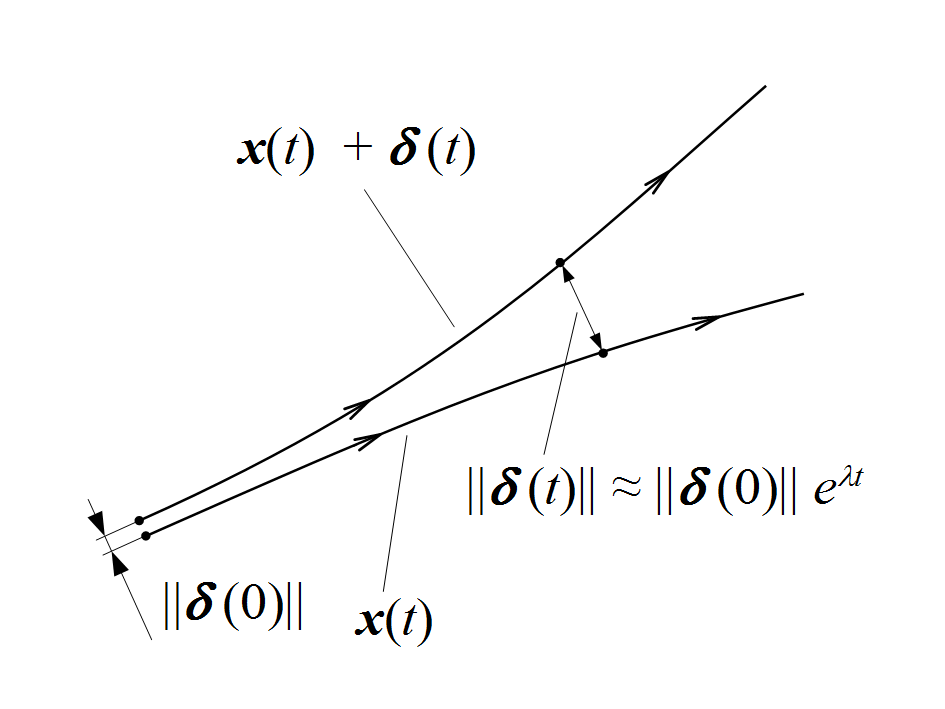

Consider the above image where two nearby trajectories evolved in time. 
* $\lambda$ denotes the "maximum Lyapunov exponent"
* A $D$ dimensional system has $D$ exponents
* In general a trajectory is called "chatoic" if
    - 1. It follows nonlinear dynamics
    - 2. It is bounded (donot escape to infinity)
    - 3. It has at lest one positive Lyaponov exponent

### Example for exponentail seperation
Before we start calculating the Lyapunov exponents we will try to understand what does exponential seperation of trajectories mean. For demonstraction we will consider hte Henon Map as a dynamical system

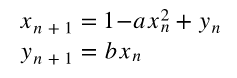

In [141]:
henon = Systems.henon()

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      hoop
 in-place?    false
 jacobian:    hoop_jac
 parameters:  [1.4, 0.3]

First we will generate a trajectory for the towel map, tr1, from the default inital condition 

In [143]:
tr1 = trajectory(henon, 100)
summary(tr1)

"2-dimensional Dataset{Float64} with 101 points"

Next we will generate a second trajectory, tr2, with a starting point slightly shifted from the initial condition of tr1

In [145]:
u2 = get_state(henon) + (1e-9*ones(dimension(henon)))

2-element StaticArrays.SArray{Tuple{2},Float64,1,2} with indices SOneTo(2):
 1.0e-9
 1.0e-9

In [147]:
tr2 = trajectory(henon, 100, u2)
summary(tr2)

"2-dimensional Dataset{Float64} with 101 points"

In [148]:
using LinearAlgebra: norm

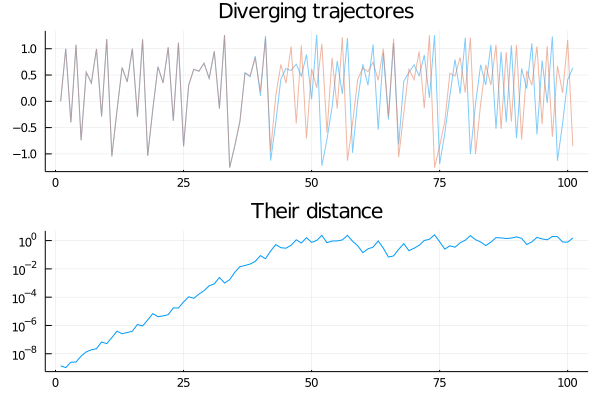

In [159]:
#plot the X-coordinate of the two trajectories:
p1 = plot(tr1[:,1], alpha=0.5, title="Diverging trajectores")
plot!(tr2[:,1], alpha=0.5)

# plot the distance between these two trajectories in a semilog plot
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
p2 = plot(d, yaxis=:log, title="Their distance")

plot(p1, p2, layout=(2,1), legend=false)

### Computing Lyapunov Exponents for Discrete systems

`lyapunov` is a function that calculates the maximum Lyapunov exponenent of DynamicalSyatem for a given starting point and sa given et of parameters

In [160]:
λ = lyapunov(henon, 5000) # 5000 is the number of steps given to teh system to evolve

0.424089183372981

This number is approximately the slope of the distance increase!. We will do a plot to see the slpe line along with the distances graph.

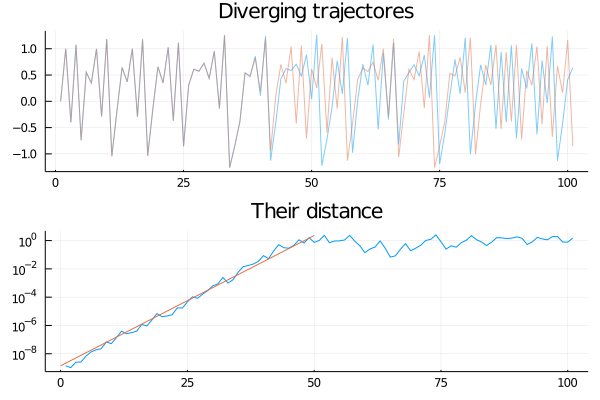

In [163]:
using LinearAlgebra: norm

#plot the X-coordinate of the two trajectories:
p1 = plot(tr1[:,1], alpha=0.5, title="Diverging trajectores")
plot!(tr2[:,1], alpha=0.5)

# plot the distance between these two trajectories in a semilog plot
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
p2 = plot(d, yaxis=:log, title="Their distance")
plot!(collect(0:50), d[1].* exp.(collect(0:50).*λ ))

plot(p1, p2, layout=(2,1), legend=false)

TO get more Lyapunox exponents we can use the function `lyapunonvs`

In [173]:
lyapunovs(henon, 2000)

2-element Array{Float64,1}:
  0.42218169239400405
 -1.6261544967199422

### Computing Lyapunov exponents for continuous systems

* All functions that accept a `DynamicalSystem` work with any instance of `DynamicalSystem`, regardless of wheather it is continuous, discrete, in-place, out-of-place, with Jacobian or whatever.

* `lyapunov` and `lyapunovs` both just work fine for lorentz system too

In [201]:
lor = Systems.lorenz()
lyapunov(lor, 2000.0)

0.891916246377175

In [202]:
lyapunovs(lor, 2000)

3-element Array{Float64,1}:
   0.8952266609351622
   2.8383938590243e-5
 -14.561897557154838

Remember from the Poincare section that for some parameter values the Lorentz sysem was periodic, for others it was not

In [206]:

ρs = (69.75, 28.0)
c = ["red", "blue"]
for (i, ρ) in enumerate(ρs)
    set_parameter!(lor, 2, ρ)
    psos = poincaresos(lor, (2, 0.0), 2000.0, Ttr = 2000.0)
    pi = scatter(psos[:, 1], psos[:, 3],
        markersize=0.15, markeralpha = 0.15, markercolor=c[i], 
        title=string("\\rho", " = $ρ, ", (i != 1 ? "not periodic" : "periodic")))
    push!(p, pi)
end

plot(p[1],layout=(1,),legend=false, size=(1000,500))


Seems like the exponent in the first case λ should be equal to zero, and in the second λ should be positive.

In [207]:
ρs = (69.75, 28.0)

for (i, ρ) in enumerate(ρs)
    set_parameter!(lor, 2, ρ)
    λ = lyapunov(lor, 2000.0; Ttr = 2000.0)
    println("For ρ = $ρ, λ = $λ")
end

For ρ = 69.75, λ = -0.00014990390240304403
For ρ = 28.0, λ = 0.9047748085497478


One has to be very careful when using th efunctionss like `lyapunovs`. They are only aproximate methods ans naviely do short computations or not using large transient times cn results in wrong results

In [208]:
for (i, ρ) in enumerate(ρs)
    set_parameter!(lor, 2, ρ)
    λ = lyapunov(lor, 200.0) # smaller integration time, no transient time
    println("For ρ = $ρ, λ = $λ")
end

For ρ = 69.75, λ = 0.18490371491733312
For ρ = 28.0, λ = 0.7926460928213243
